<a href="https://colab.research.google.com/github/Annieng184/Annieng184/blob/main/Data_Reporting_with_Pandas%2C_Numpy_and_Matplotlib(part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns


In [5]:
#get data files here: https://drive.google.com/drive/folders/1Y2rY-n_iO1dJYcnOgaFhzjPYHr_fD_pD
#merge 12 seperated csv files through terminal on mac
#step 1: Open Terminal. Enter 'pwd'. Hit Enter
#step 2: Type 'cd'. Paste file path "/Users/devin/Desktop/combine". Hit Enter
#step 3: Type "cat *.csv >sales_2019.csv" 


In [6]:
#import file from local drive
from google.colab import files
uploaded = files.upload()

Saving sales_2019.csv to sales_2019.csv


In [7]:
df = pd.read_csv(io.BytesIO(uploaded['sales_2019.csv']))
print(df)
len(df)

       Order ID                   Product Quantity Ordered Price Each  \
0        141234                    iPhone                1        700   
1        141235  Lightning Charging Cable                1      14.95   
2        141236          Wired Headphones                2      11.99   
3        141237          27in FHD Monitor                1     149.99   
4        141238          Wired Headphones                1      11.99   
...         ...                       ...              ...        ...   
186856   259353    AAA Batteries (4-pack)                3       2.99   
186857   259354                    iPhone                1        700   
186858   259355                    iPhone                1        700   
186859   259356    34in Ultrawide Monitor                1     379.99   
186860   259357      USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       01/22/19 21:25          944 Walnut St, Boston, MA

186861

In [8]:
#clean and update dataframe
df = df.dropna() #remove empty row in dataframe
len(df)


186316

**#QUESTION 1: WHAT WAS THE BEST MONTH FOR SALES?**


In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [10]:
#add month column
df['Month'] = df['Order Date'].str.slice(0,2,1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [11]:
#check values of Month column
print(set(df['Month'])) 

{'04', '08', '07', '06', '10', '01', '05', '11', 'Or', '12', '03', '02', '09'}


In [12]:
#get rid of 'Or' value
df = df[df['Month'] != 'Or']

In [13]:
#check current values of Month column
print(set(df['Month'])) 

{'04', '08', '07', '06', '10', '01', '05', '11', '12', '03', '02', '09'}


In [14]:
#create Sales column by multiplying Quantity Ordered and Price Each (make sure both of them converted to int)
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [15]:
#convert Quantity Ordered and Price Each to int in order to multiplying
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [16]:
#double check
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [17]:
#create Sales column by multiplying Quantity Ordered and Price Each
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [18]:
#move Sales column next to Price Each for better look
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [19]:
#calculate total Sales by Month
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [20]:
sales_value = df.groupby('Month').sum()['Sales']


In [21]:
sales_value.max() #find the max values


4613443.5

In [44]:
#styling and make your chart prettier with seaborn
sns.set_theme()

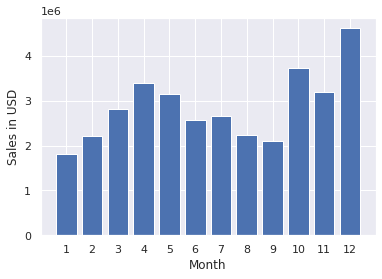

In [45]:
#visualize into chart
months = range(1,13)
plt.bar(x = months, height = sales_value)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

**#QUESTION 2: WHAT CITY HAS THE BEST VALUE?**

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [26]:
#split City from Purchase Address
sample_address = '944 Walnut St, Boston, MA 02215	01'

address_to_city = lambda address:address.split(',')[1]


In [28]:
#create new column City with splited value 
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [33]:
#calculate total sales by city
df.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [32]:
city_value = df.groupby('City').sum()['Sales']
city_value.max()

8262204.0

In [41]:
cities = []
for city, sales in city_value.items():
  cities.append(city)
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


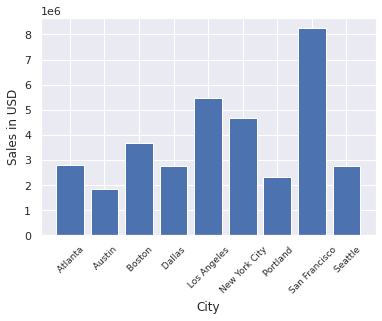

In [51]:
#visualize into chart
plt.bar(x = cities, height = city_value)
plt.xticks(cities, rotation = 45, size = 9)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

**#QUESTION 3: WHAT TIME SHOULD WE DISPLAY ADS TO MAXIMIZE THE LIKELIHOOD OF CUSTOMER'S BUYING PRODUCT?**


In [53]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [58]:
#convert Order Date from string type to datetime type 
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtypes)

datetime64[ns]


In [61]:
#split Hour from Order Date using datetime library
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [62]:
#calculate total sales by hours
df.groupby('Hours').sum()['Sales']

Hours
0     7.137212e+05
1     4.608669e+05
2     2.348514e+05
3     1.457579e+05
4     1.626610e+05
5     2.306798e+05
6     4.481130e+05
7     7.448541e+05
8     1.192349e+06
9     1.639031e+06
10    1.944287e+06
11    2.300610e+06
12    2.316821e+06
13    2.155390e+06
14    2.083673e+06
15    1.941550e+06
16    1.904601e+06
17    2.129362e+06
18    2.219348e+06
19    2.412938e+06
20    2.281716e+06
21    2.042001e+06
22    1.607549e+06
23    1.179304e+06
Name: Sales, dtype: float32

In [71]:
hour_value = df.groupby('Hours').sum()['Sales']
hour_value.nlargest(n=7)

Hours
19    2412938.50
12    2316821.25
11    2300610.25
20    2281716.25
18    2219348.25
13    2155389.75
17    2129361.50
Name: Sales, dtype: float32

In [74]:
hours = []
for hour, sales in hour_value.items():
  hours.append(hour)
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


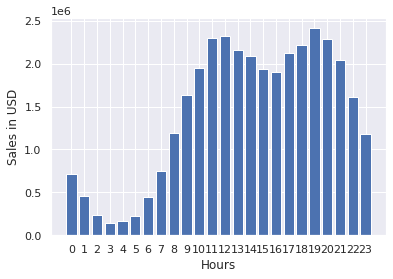

In [75]:
#visualize into chart
plt.bar(x = hours, height = hour_value)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()
# We should display ads from 11AM to 1PM or 5PM to 8PM